In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")
import os


data = pd.read_csv("./data/cleveland_short.csv")

In [30]:
column_list = data.columns
for i in column_list:
    print("Values of",i,"column\n",data[i].unique())
    print("--------------\n")
    
data.describe()

Values of age column
 [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
--------------

Values of sex column
 [1 0]
--------------

Values of cp column
 [1 4 3 2]
--------------

Values of trestbps column
 [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154]
--------------

Values of chol column
 [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


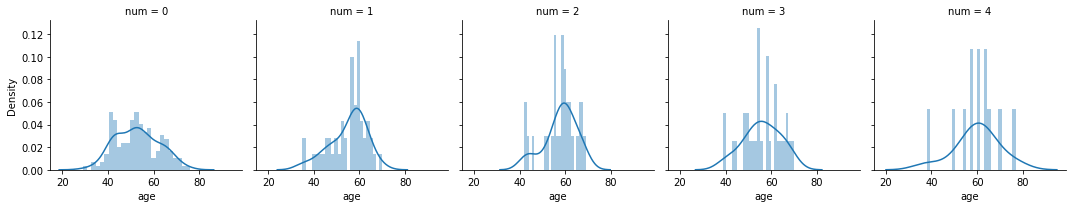

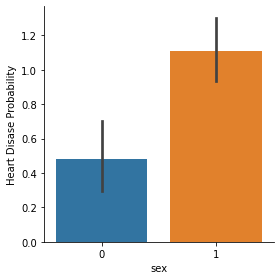

In [31]:
g = sns.FacetGrid(data, col = "num")
g.map(sns.distplot, "age", bins = 25)
plt.show()
column_list2 = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]
g = sns.factorplot(x = column_list2[0], y = "num", data = data, kind = "bar",size=4)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels(column_list2[0])
plt.show()

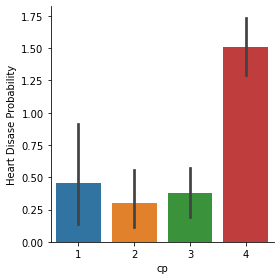

In [32]:
g = sns.factorplot(x = column_list2[1], y = "num", data = data, kind = "bar",size=4)
g.set_ylabels("Heart Disase Probability")
g.set_xlabels(column_list2[1])
plt.show()

In [33]:
dummy_list = ["sex","cp","restecg","exang","slope","thal"]
data = pd.get_dummies(data,columns=dummy_list)
data.head()

,age,trestbps,chol,fbs,thalach,oldpeak,ca,num,sex_0,sex_1,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_-9,thal_3,thal_6,thal_7
0,63,145,233,1,150,2.3,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0
1,67,160,286,0,108,1.5,3,2,0,1,...,1,0,1,0,1,0,0,1,0,0
2,67,120,229,0,129,2.6,2,1,0,1,...,1,0,1,0,1,0,0,0,0,1
3,37,130,250,0,187,3.5,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,41,130,204,0,172,1.4,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
y = data.num.values
x_data = data.drop(["num"],axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

x_train 197
x_test 85
y_train 197
y_test 85


In [37]:
random_state = 42
classifier = [KNeighborsClassifier(),
              SVC(random_state = random_state,probability=True),
              DecisionTreeClassifier(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             ]

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

svm_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}


classifier_param = [knn_param_grid,
                   svm_param_grid,
                    dt_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [38]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_ * 100)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 40 candidates, totalling 400 fits
63.973684210526315
Fitting 10 folds for each of 28 candidates, totalling 280 fits
63.447368421052616
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
60.39473684210528
Fitting 10 folds for each of 54 candidates, totalling 540 fits
63.52631578947368
Fitting 10 folds for each of 14 candidates, totalling 140 fits
59.89473684210527


Text(0.5, 1.0, 'Cross Validation Scores')

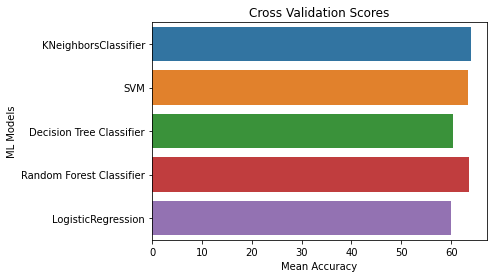

In [11]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "KNeighborsClassifier", "SVM","Decision Tree Classifier",
             "Random Forest Classifier","LogisticRegression",
            ]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [12]:
print(best_estimators)
knn9 = KNeighborsClassifier(n_neighbors = 9)
knn9.fit(x_train, y_train)
y_head_knn = knn9.predict(x_test)

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
y_head_svm = svm.predict(x_test)

rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(x_train,y_train)
y_head_rf = rf.predict(x_test)

[KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance'), SVC(C=1, gamma=1, probability=True, random_state=42), DecisionTreeClassifier(max_depth=3, min_samples_split=30, random_state=42), RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=10,
                       n_estimators=300, random_state=42), LogisticRegression(C=0.1, random_state=42)]


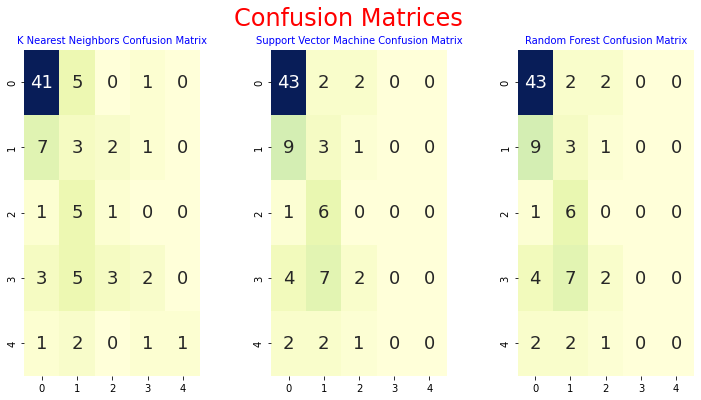

In [13]:
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_rf = confusion_matrix(y_test,y_head_rf)

plt.figure(figsize=(12,6))
plt.suptitle("Confusion Matrices",fontsize=24, color="red")
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_knn,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(1,3,2)
plt.title("Support Vector Machine Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(1,3,3)
plt.title("Random Forest Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.show()

In [14]:
votingC = VotingClassifier(estimators = [("knn",best_estimators[0]),
                                        ("svm",best_estimators[1]),
                                        ("rf",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print("Accuracy of Ensemble: {:.2f}".format(accuracy_score(votingC.predict(x_test),y_test)*100))

Accuracy of Ensemble: 57.65


In [15]:
best_accuracies_each_classes = {}
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy_lr_train = round(lr.score(x_train, y_train)*100,2) 
accuracy_lr_test = round(lr.score(x_test,y_test)*100,2)
best_accuracies_each_classes["Logistic Regression"] = lr.score(x_test,y_test)*100
print("Training Accuracy: {}%".format(accuracy_lr_train))
print("Testing Accuracy: {}%".format(accuracy_lr_test))

Training Accuracy: 67.51%
Testing Accuracy: 52.94%


Best Test KNN Score accuracy is: 60.00


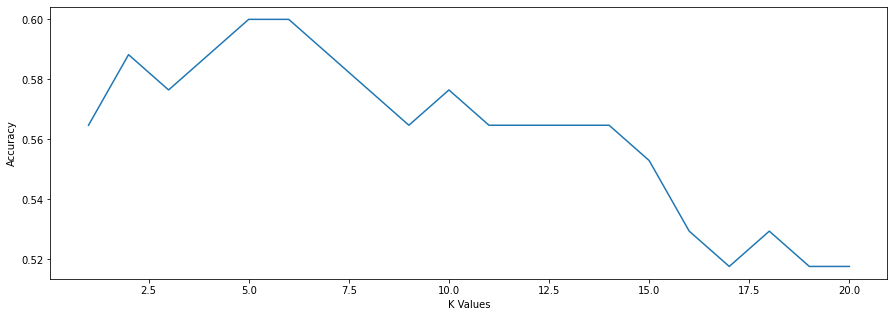

In [16]:
score_list_test = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    score_list_test.append(knn.score(x_test,y_test))
    
best_accuracies_each_classes["KNN"] = max(score_list_test)*100
print("Best Test KNN Score accuracy is: {:.2f}".format(max(score_list_test)*100))

plt.figure(figsize=(15,5))
plt.plot(range(1,21),score_list_test)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

In [17]:
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

best_accuracies_each_classes["SVM"] = svm.score(x_test,y_test)*100
print("Accuracy of SVM Algo: {:.2f}".format(svm.score(x_test,y_test)*100))

Accuracy of SVM Algo: 54.12


In [18]:
nb = GaussianNB()
nb.fit(x_train,y_train)

best_accuracies_each_classes["Naive Bayes"] = nb.score(x_test,y_test)*100
print("Accuracy of Naive Bayes: {:.2f}".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 9.41


In [19]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

best_accuracies_each_classes["Decision Tree"] = dt.score(x_test,y_test)*100
print("Accuracy of Decision Tree: {:.2f}".format(dt.score(x_test,y_test)*100))

Accuracy of Decision Tree: 51.76


In [20]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(x_train,y_train)

best_accuracies_each_classes["Random Forest"] = rf.score(x_test,y_test)*100
print("Accuracy of  Random Forest is: {:.2f}".format(rf.score(x_test,y_test)*100))

Accuracy of  Random Forest is: 58.82


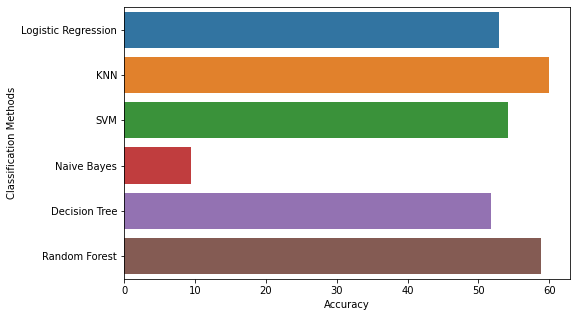

In [21]:
plt.figure(figsize=(8,5))
sns.barplot( y=list(best_accuracies_each_classes.keys()), x=list(best_accuracies_each_classes.values()))
plt.xlabel("Accuracy")
plt.ylabel("Classification Methods")
plt.show()

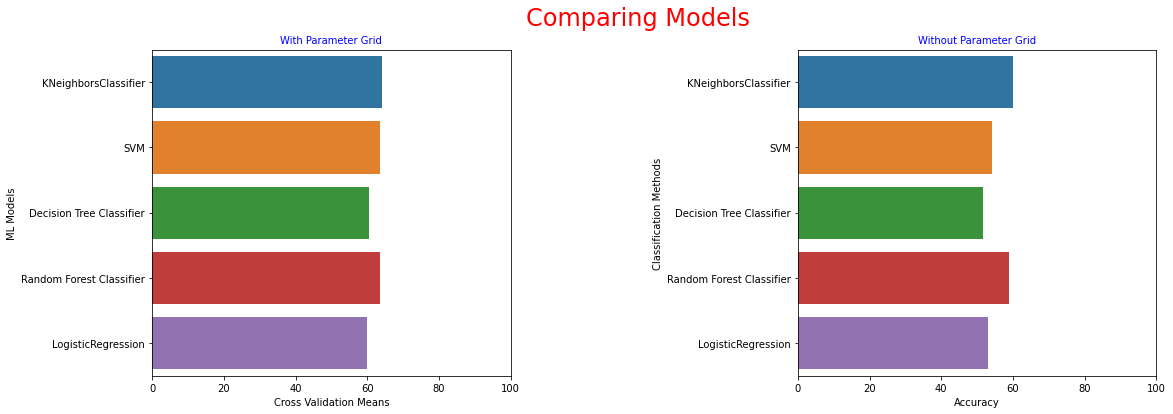

In [22]:


cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "KNeighborsClassifier", "SVM","Decision Tree Classifier",
             "Random Forest Classifier","LogisticRegression",
            ]})

plt.figure(figsize=(18,6))
plt.suptitle("Comparing Models",fontsize=24, color="red")
plt.subplots_adjust(wspace = 0.8, hspace= 0.4)

plt.subplot(1,2,1)
plt.title("With Parameter Grid",fontsize=10,color="blue")
sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
plt.xlim(0, 100)

plt.subplot(1,2,2)
plt.title("Without Parameter Grid",fontsize=10,color="blue")
sns.barplot( y=['KNeighborsClassifier',
                 'SVM',
                 'Decision Tree Classifier',
                 'Random Forest Classifier',
                 'LogisticRegression'] , x=[best_accuracies_each_classes['KNN'], best_accuracies_each_classes['SVM'], best_accuracies_each_classes['Decision Tree'], best_accuracies_each_classes['Random Forest'], best_accuracies_each_classes['Logistic Regression']])
plt.xlim(0, 100)
plt.xlabel("Accuracy")
plt.ylabel("Classification Methods")
plt.show()

In [23]:
bt_df = pd.read_csv("./data/cleveland_short.csv")

x1 = bt_df[bt_df.columns.drop('num')]
y1 = bt_df['num']

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, train_size=0.6, test_size=0.4)
xtrain1, xcv1, ytrain1, ycv1 = train_test_split(xtrain1, ytrain1, train_size=0.75, test_size=0.25)


              precision    recall  f1-score   support

           0       0.64      0.86      0.73        21
           1       0.50      0.33      0.40        12
           2       0.00      0.00      0.00         4
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         1

    accuracy                           0.53        43
   macro avg       0.33      0.28      0.28        43
weighted avg       0.51      0.53      0.50        43



array([0.73076923, 0.52      , 0.64      , 0.6       , 0.56      ])

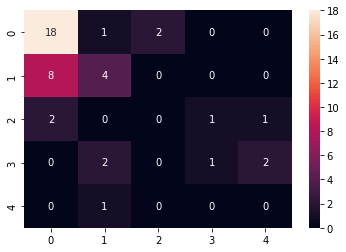

In [24]:
# Linear kernel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns


LsvmClassifier = SVC(kernel='linear', random_state=0)
LsvmClassifier.fit(xtrain1, ytrain1)
yprediction = LsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(LsvmClassifier, xtrain1, ytrain1, cv=5)

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        21
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.49        43
   macro avg       0.10      0.20      0.13        43
weighted avg       0.24      0.49      0.32        43



array([0.53846154, 0.56      , 0.52      , 0.52      , 0.52      ])

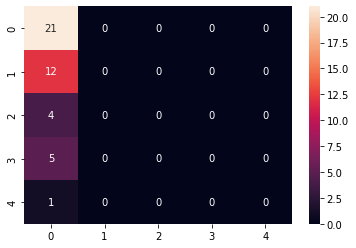

In [25]:
# Polynomial kernel

PsvmClassifier = SVC(kernel='poly', random_state=0)
PsvmClassifier.fit(xtrain1, ytrain1)
yprediction = PsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(PsvmClassifier, xtrain1, ytrain1, cv=5)

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        21
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.49        43
   macro avg       0.10      0.20      0.13        43
weighted avg       0.24      0.49      0.32        43



array([0.53846154, 0.56      , 0.52      , 0.52      , 0.52      ])

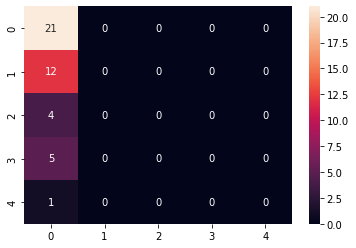

In [26]:
# RBF kernel

RsvmClassifier = SVC(kernel='rbf', random_state=0)
RsvmClassifier.fit(xtrain1, ytrain1)
yprediction = RsvmClassifier.predict(xcv1)
cm = confusion_matrix(ycv1, yprediction)
sns.heatmap(cm, annot=True)
print(classification_report(ycv1, yprediction))
cross_val_score(RsvmClassifier, xtrain1, ytrain1, cv=5)

In [43]:
param_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'max_iter' : [1000]}, 
              {'kernel': ['poly'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000], 'max_iter' : [1000]}, 
              {'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000], 'max_iter' : [1000]}]


scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    
    clf = GridSearchCV(SVC(), param_grid, scoring='%s_macro' % score)

    clf.fit(xtrain1, ytrain1)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']          
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
         print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = ytest1, clf.predict(xtest1)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision
Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 1000}

Grid scores on development set:

0.259 (+/-0.123) for {'C': 1, 'kernel': 'linear', 'max_iter': 1000}
0.259 (+/-0.130) for {'C': 10, 'kernel': 'linear', 'max_iter': 1000}
0.259 (+/-0.130) for {'C': 100, 'kernel': 'linear', 'max_iter': 1000}
0.259 (+/-0.130) for {'C': 1000, 'kernel': 'linear', 'max_iter': 1000}
0.307 (+/-0.257) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 1000}
0.306 (+/-0.140) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly', 'max_iter': 1000}
0.307 (+/-0.257) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 1000}
0.299 (+/-0.290) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly', 'max_iter': 1000}
0.307 (+/-0.257) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 1000}
0.257 (+/-0.107) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly', 'max_iter': 1000}
0.307 (+/-0.257) for {'C': 1000, 'gamma

### 57% small dataset Best accuracy in SVM